2023-06-25 00:10:26.934851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 00:10:27.566846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[0/2000 epochs] 
Training complete! 0.0minutes, 0.91seconds
[[0.]
 [1.]
 [1.]
 [0.]]
Train Loss : 0.003, Test Loss : 0.003


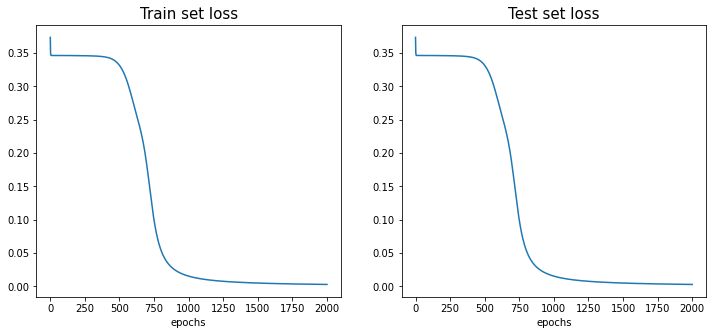

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time as stamp
from Layer import *
from Activation import *

"""
Example list
1) sigmoid, BCE, one-hot=False
2) sigmoid, BCE, one-hot=True
3) softmax, CE
6) sin function, MSE
7) MNIST, CE
"""

"""[XOR] 1. activation: sigmoid, data: None, loss: BCE"""

seed = int(float(str(stamp())[11:]) / 1e+4)
np.random.seed(seed)

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
y_one_hot = OneHot(np.array([0, 1, 1, 0]), 2)

d1 = Dense(2, 4, optimizer='SGD', activation = "sigmoid", name = 'd1')
d2 = Dense(4, 1, optimizer='SGD', activation = "sigmoid", name = 'd2')

CE = "CrossEntropy"
BCE = "CrossEntropy_binary"
metric = "accuracy"
model = SequentialModel()
model.add(d1)
model.add(d2)

model.model_compile(batch_size=4, epochs=2000, lr=0.3, loss=BCE,
                    built_in_diff=False, metric=metric, verbose=False)
model.fit(x, y, x , y)
print(np.around(model(x)))
model.print_loss()

[0/2000 epochs] 
Training complete! 0.0minutes, 0.88seconds
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Train Loss : 0.003, Test Loss : 0.003


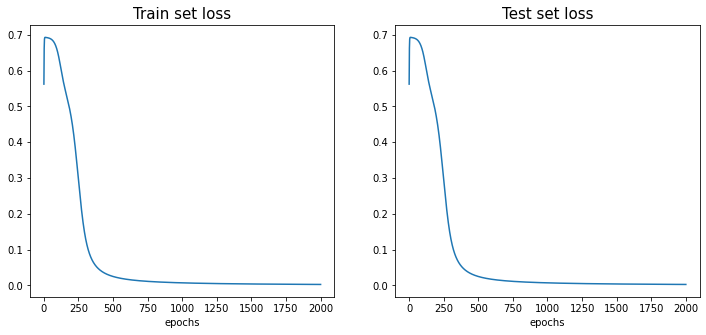

In [2]:
"""[XOR] 2. activation: sigmoid, data: one-hot, loss: BCE"""
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
y_one_hot = OneHot(np.array([0, 1, 1, 0]), 2)

d1 = Dense(2, 4, optimizer='SGD', activation = "sigmoid", name = 'd1')
d2 = Dense(4, 2, optimizer='SGD', activation = "sigmoid", name = 'd2')

CE = "CrossEntropy"
BCE = "CrossEntropy_binary"
metric = "accuracy"
model = SequentialModel()
model.add(d1)
model.add(d2)

model.model_compile(batch_size=4, epochs=2000, lr=0.3, loss=BCE,
                    built_in_diff=False, metric=metric, verbose=False)
model.fit(x, y_one_hot, x , y_one_hot)
print(np.around(model(x)))
model.print_loss()

[0/2000 epochs] 
Training complete! 0.0minutes, 1.04seconds
[[0]
 [1]
 [1]
 [0]]
Train Loss : 0.001, Test Loss : 0.001


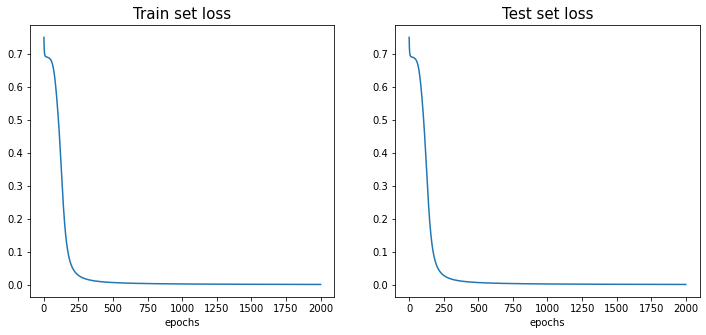

In [3]:
"""[XOR] 3. activation: softmax, data: one-hot, loss: CE"""
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
y_one_hot = OneHot(np.array([0, 1, 1, 0]), 2)

d1 = Dense(2, 4, optimizer='SGD', activation = "sigmoid", name = 'd1')
d2 = Dense(4, 2, optimizer='SGD', activation = "softmax", name = 'd2')

CE = "CrossEntropy"
BCE = "CrossEntropy_binary"
metric = "accuracy"
model = SequentialModel()
model.add(d1)
model.add(d2)

model.model_compile(batch_size=4, epochs=2000, lr=1, loss=CE,
                    built_in_diff=False, metric=metric, verbose=False)
model.fit(x, y_one_hot, x , y_one_hot)
print(np.argmax(model(x), axis=1).reshape(4,1))
model.print_loss()

[0/2000 epochs] 
Training complete! 0.0minutes, 0.6seconds
[[0]
 [1]
 [1]
 [0]]
Train Loss : 0.002, Test Loss : 0.002


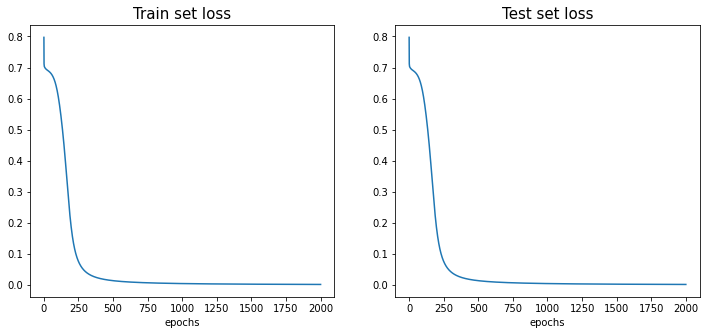

In [4]:
"""[XOR] 4. activation: softmax(diff=True), data: one-hot, loss: SWC"""
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
y_one_hot = OneHot(np.array([0, 1, 1, 0]), 2)

d1 = Dense(2, 4, optimizer='SGD', activation = "sigmoid", name = 'd1')
d2 = Dense(4, 2, optimizer='SGD', activation = Softmax(True), name = 'd2')

CE = "CrossEntropy"
BCE = "CrossEntropy_binary"
SWC = "Softmax_with_CrossEntropy"
metric = "accuracy"
model = SequentialModel()
model.add(d1)
model.add(d2)

model.model_compile(batch_size=4, epochs=2000, lr=0.3, loss=SWC,
                    built_in_diff=True, metric=metric, verbose=False)
model.fit(x, y_one_hot, x , y_one_hot)
print(np.argmax(model(x), axis=1).reshape(4,1))
model.print_loss()

[0/1500 epochs] 
Training complete! 0.0minutes, 4.6seconds
Train Loss : 0.0, Test Loss : 0.0


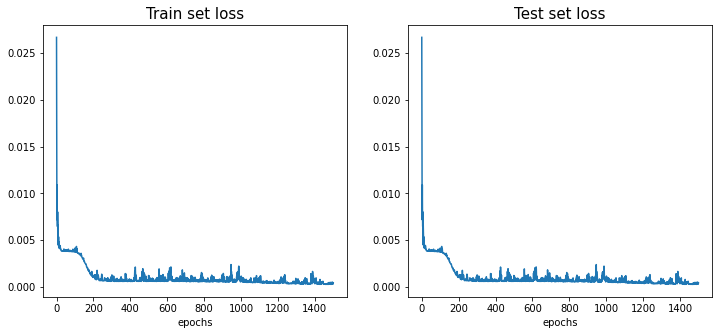

In [5]:
"""[sin] inference sin function"""
x = np.linspace(0, 2 * np.pi, num=100).reshape(-1, 1)
true_y = np.sin(x)

d1 = Dense(1, 20, optimizer='Adam', activation = "relu", name = 'd1')
d2 = Dense(20, 20, optimizer='Adam', activation = "relu", name = 'd2')
d3 = Dense(20, 1, optimizer='Adam', activation = "linear", name = 'd3')

CE = "CrossEntropy"
BCE = "CrossEntropy_binary"
MSE = "MSE"
model = SequentialModel()
model.add(d1)
model.add(d2)
model.add(d3)
model.model_compile(batch_size=30, epochs=1500, lr=0.01, loss=MSE,
                    built_in_diff=False, metric="rmse", verbose=False)

model.fit(x, true_y, x , true_y)
model.print_loss()

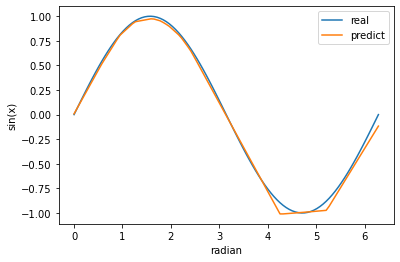

In [6]:
pred_y = model(x)
plt.plot(x, true_y, label="real")
plt.plot(x, pred_y, label="predict")
plt.xlabel('radian')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

[0/10 epochs] 
Train Accuracy : 9.75%, Test Accuracy : 10.4%

[1/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 93.45%, Test Accuracy : 89.8%

[2/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 96.975%, Test Accuracy : 92.5%

[3/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 97.95%, Test Accuracy : 93.5%

[4/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 97.575%, Test Accuracy : 92.4%

[5/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 98.075%, Test Accuracy : 93.3%

[6/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 96.975%, Test Accuracy : 91.3%

[7/10 epochs]
mini batch : 100% [========================================]          
Train Accuracy : 98.275%, Test Accuracy : 93.3%

[8

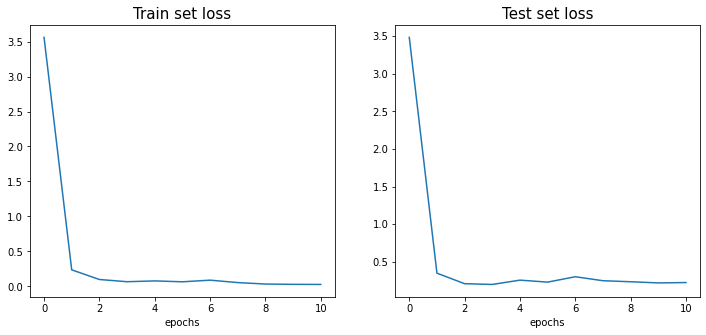

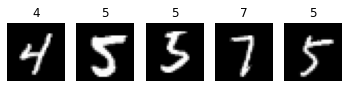

In [7]:
"""
[MNIST] 
Classifying MNIST dataset using convolution layer.
Optimizer: Adam, Activation: softmax, Loss: Cross Entropy
"""

seed = int(float(str(stamp())[11:]) / 1e+4)
np.random.seed(seed)

mnist = tf.keras.datasets.mnist
np.random.seed(26)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:4000].reshape(-1,28,28).astype(np.float32) / 255.0
X_test = X_test[:1000].reshape(-1,28,28).astype(np.float32) / 255.0

num_class = 10
y_train = y_train[:4000]
y_test = y_test[:1000]
y_train = OneHot(y_train, num_class)
y_test = OneHot(y_test, num_class)

img_shape = (1, 28, 28)
flt_shape = (10, 3, 3)

conv1 = Conv2D(img_shape, flt_shape, 0, 1, activation = 'relu', optimizer='Adam', name = 'conv1')
conv2 =  Conv2D(conv1.y_shape(), flt_shape, 0, 1, activation = 'relu', optimizer='Adam', name = 'conv2')
pool1 = Pooling(conv2.y_shape(), 2, 0, name = 'pool1')
d1 = Dense(pool1.y_shape_fc(), 400, optimizer='Adam', activation = 'relu', name = 'd1')
p1 = Dropout(0.5)
d2 = Dense(400, 200, optimizer='Adam', activation = 'relu', name = 'd2')
p2 = Dropout(0.5)
d3 = Dense(200, 10, optimizer='Adam', activation = 'softmax', name = 'd3')
aa = "CrossEntropy"
model = SequentialModel()
model.add(conv1)
model.add(conv2)
model.add(pool1)
model.add(FCLayer())
model.add(d1)
model.add(p1)
model.add(d2)
model.add(p2)
model.add(d3)
model.model_compile(batch_size=20, epochs=10, lr=0.01, loss=aa, metric="accuracy", verbose=True)
model.fit(X_train, y_train, X_test, y_test)
model.print_loss()

seed = int(float(str(stamp())[11:]) / 1e+4)
np.random.seed(seed)

random_num = np.random.randint(0,1000,5)
pic = {}
fig = plt.figure()

for num, i in enumerate(random_num):
    pic[np.argmax(y_test[i])] = X_test[i]
    predict = model(X_test[i].reshape(1,1,28,28))
    ax1 = fig.add_subplot(1,5,num+1)
    ax1.imshow(X_test[i],cmap='gray')
    ax1.set_title(f'{np.argmax(predict)}')
    ax1.axis("off")
    
plt.show()